# REGRESSION LOGISTIQUE

- C'est un mod√®le math√©matique utilis√© en machine learning pour pr√©dire si quelque chose appartient √† une cat√©gorie OUI/NON (binaire).
- Elle analyse les facteurs (√¢ge, tension, cholest√©rol...).
- Elle applique une fonction sp√©ciale (la sigmo√Øde) qui transforme les r√©sultats en probabilit√©s (entre 0 et 1).
- Si la probabilit√© est > 50%, on pr√©dit malade (1).
- Si elle est < 50%, on pr√©dit non malade (0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import shap
import joblib

# Charger les donn√©es
df = pd.read_csv('../DATA/donn√©e_malades_cardiaques.csv', index_col=0)

# Supprimer les colonnes inutiles
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df

ModuleNotFoundError: No module named 'shap'

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   √Çge                             917 non-null    int64
 1   Sexe                            917 non-null    int64
 2   Tension_aurepos                 917 non-null    int64
 3   Cholest√©rol                     917 non-null    int64
 4   Glyc√©mie√†_jeun                  917 non-null    int64
 5   Fr√©quence_cardiaque_max         917 non-null    int64
 6   Angine_d_effort                 917 non-null    int64
 7   D√©pression_ST                   917 non-null    int64
 8   Maladie_cardiaque               917 non-null    int64
 9   Type_de_douleur_thoracique_ASY  917 non-null    int64
 10  Type_de_douleur_thoracique_ATA  917 non-null    int64
 11  Type_de_douleur_thoracique_NAP  917 non-null    int64
 12  Type_de_douleur_thoracique_TA   917 non-null    int64
 13  ECG_

In [415]:
display(df.describe())

√Çge        Sexe  Tension_aurepos  Cholest√©rol  Glyc√©mie√†_jeun  \
count  917.000000  917.000000       917.000000   917.000000      917.000000   
mean    53.509269    0.789531       132.540894   243.211559        0.233370   
std      9.437636    0.407864        17.999749    53.430044        0.423206   
min     28.000000    0.000000        80.000000    85.000000        0.000000   
25%     47.000000    1.000000       120.000000   214.000000        0.000000   
50%     54.000000    1.000000       130.000000   237.000000        0.000000   
75%     60.000000    1.000000       140.000000   267.000000        0.000000   
max     77.000000    1.000000       200.000000   603.000000        1.000000   

       Fr√©quence_cardiaque_max  Angine_d_effort  D√©pression_ST  \
count               917.000000       917.000000     917.000000   
mean                136.789531         0.404580       0.719738   
std                  25.467129         0.491078       0.990662   
min                  60.000000         0.000000      -2.000000   
25%                 120.000000         0.000000       0.000000   
50%                 138.000000         0.000000       0.000000   
75%                 156.000000         1.000000       1.000000   
max                 202.000000         1.000000       6.000000   

       Maladie_cardiaque  Type_de_douleur_thoracique_ASY  \
count         917.000000                      917.000000   
mean            0.552890                        0.540894   
std             0.497466                        0.498597   
min             0.000000                        0.000000   
25%             0.000000                        0.000000   
50%             1.000000                        1.000000   
75%             1.000000                        1.000000   
max             1.000000                        1.000000   

       Type_de_douleur_thoracique_ATA  Type_de_douleur_thoracique_NAP  \
count                      917.000000                      917.000000   
mean                         0.188659                        0.220284   
std                          0.391451                        0.414664   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       Type_de_douleur_thoracique_TA  ECG_au_repos_LVH  ECG_au_repos_Normal  \
count                     917.000000        917.000000           917.000000   
mean                        0.050164          0.205016             0.600872   
std                         0.218401          0.403934             0.489986   
min                         0.000000          0.000000             0.000000   
25%                         0.000000          0.000000             0.000000   
50%                         0.000000          0.000000             1.000000   
75%                         0.000000          0.000000             1.000000   
max                         1.000000          1.000000             1.000000   

       ECG_au_repos_ST  Pente_ST_Down  Pente_ST_Flat  Pente_ST_Up  
count       917.000000     917.000000     917.000000   917.000000  
mean          0.194111       0.068702       0.500545     0.430752  
std           0.395731       0.253085       0.500273     0.495452  
min           0.000000       0.000000       0.000000     0.000000  
25%           0.000000       0.000000       0.000000     0.000000  
50%           0.000000       0.000000       1.000000     0.000000  
75%           0.000000       0.000000       1.000000     1.000000  
max           1.000000       1.000000       1.000000     1.000000

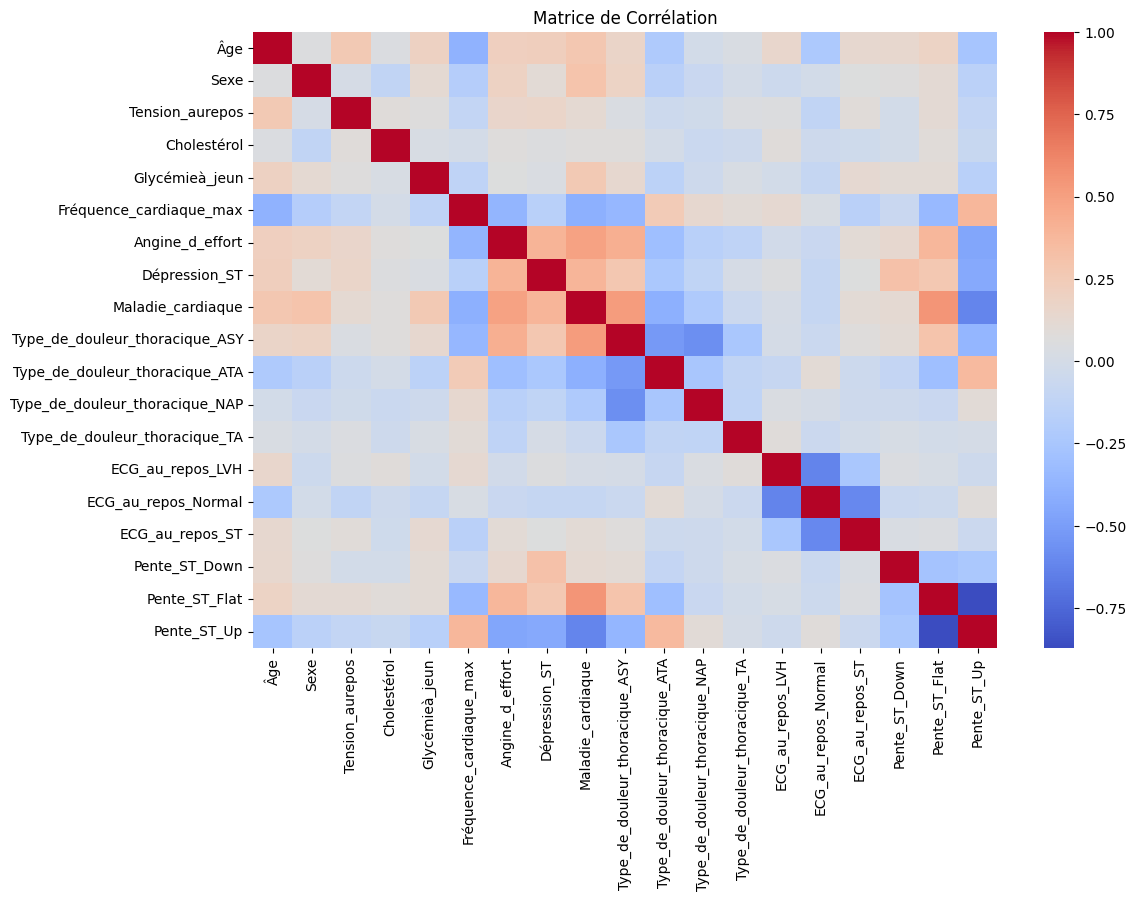

In [416]:
# V√©rifier la colin√©arit√© des variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matrice de Corr√©lation")
plt.show()

#### üîç **Observations g√©n√©rales**
- **Rouge fonc√© (+1)** ‚Üí Forte corr√©lation positive (les variables √©voluent ensemble).
- **Bleu fonc√© (-1)** ‚Üí Forte corr√©lation n√©gative (les variables √©voluent en sens oppos√©).
- **Blanc (~0)** ‚Üí Faible corr√©lation.

#### üìä **Corr√©lations importantes**
- **Corr√©lations positives √©lev√©es** :
  - `Tension au repos` ‚Üî `Cholest√©rol`  
  - `Fr√©quence cardiaque max` ‚Üî `Angine d‚Äôeffort`
  - `ECG ST` ‚Üî `Pente ST Up`

- **Corr√©lations n√©gatives √©lev√©es** :
  - `Pente ST Down` ‚Üî `Fr√©quence cardiaque max`
  - `ECG Normal` ‚Üî `Maladie Cardiaque`

#### üéØ **Impact sur la Maladie Cardiaque**
- **Facteurs cl√©s** : `Type de douleur thoracique`, `ECG au repos`, `D√©pression ST`
- **Probl√®me potentiel** : Multicolin√©arit√© entre certaines variables.

In [417]:
X = df.drop(columns=["Maladie_cardiaque"])
Y = df["Maladie_cardiaque"]

# S√©parer les donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# S√©lection de variables avec Lasso et RFE
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

# Optimisation des hyperparam√®tres avec GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, cv=5)
log_reg.fit(X_train, y_train)

# Meilleur mod√®le
best_model = log_reg.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Sauvegarde du mod√®le et du scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'feature_selector.pkl')

# √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_prob)[:2])

print(f"Meilleur mod√®le : {log_reg.best_params_}")
print(f"Accuracy : {accuracy:.2f}")
print(f"Pr√©cision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print(f"AUC : {roc_auc:.2f}")
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

Meilleur mod√®le : {'C': 10}
Accuracy : 0.88
Pr√©cision : 0.92
Rappel : 0.87
F1-score : 0.89
AUC : 0.92

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



- Accuracy = 88% ‚Üí 88% des pr√©dictions sont correctes.
- Pr√©cision = 92% ‚Üí 92% des pr√©dictions positives sont correctes.
- Rappel = 87% ‚Üí Le mod√®le d√©tecte 87% des cas r√©ellement malades.
- F1-score = 88% ‚Üí Bon √©quilibre entre pr√©cision et rappel.
- AUC = 0.92 ‚Üí Excellente capacit√© √† s√©parer les classes.

Mod√®le robuste et fiable avec un bon compromis entre pr√©cision et rappel

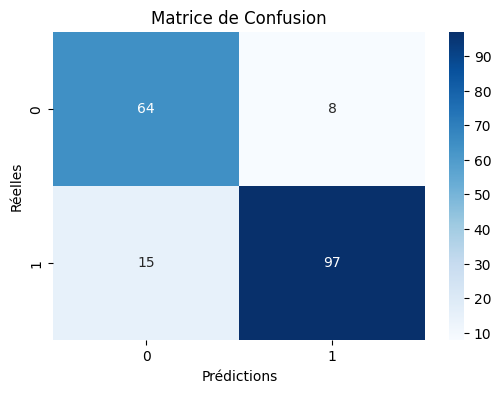

In [418]:
# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©elles")
plt.title("Matrice de Confusion")
plt.show()

- Vrais n√©gatifs (TN) = 64 ‚Üí Pr√©dits comme non malades, r√©ellement non malades.
- Faux positifs (FP) = 8 ‚Üí Pr√©dits comme malades, mais en r√©alit√© non malades.
- Faux n√©gatifs (FN) = 15 ‚Üí Pr√©dits comme non malades, mais en r√©alit√© malades.
- Vrais positifs (TP) = 97 ‚Üí Pr√©dits comme malades, r√©ellement malades.

**Bonne classification globale, mais :**
- 8 faux positifs ‚Üí Risque de fausses alertes.
- 15 faux n√©gatifs ‚Üí Patients malades non d√©tect√©s (potentiellement plus critique).

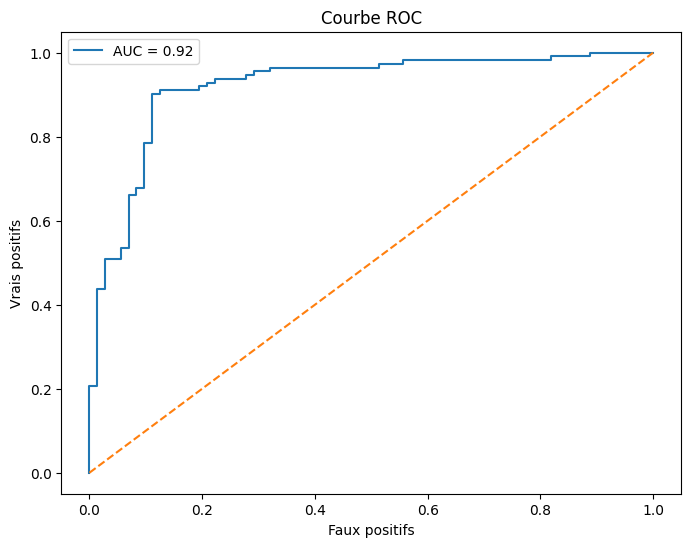

In [419]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

- L‚ÄôAUC = 0.92 indique une excellente performance du mod√®le.
- La courbe ROC (bleue) montre une s√©paration nette entre les classes.
- La diagonale (orange) repr√©sente un mod√®le al√©atoire (AUC = 0.5). 
- Mod√®le tr√®s performant : Il distingue bien les malades des non-malades.
- Peu de faux positifs : La courbe est bien √©loign√©e de la diagonale.

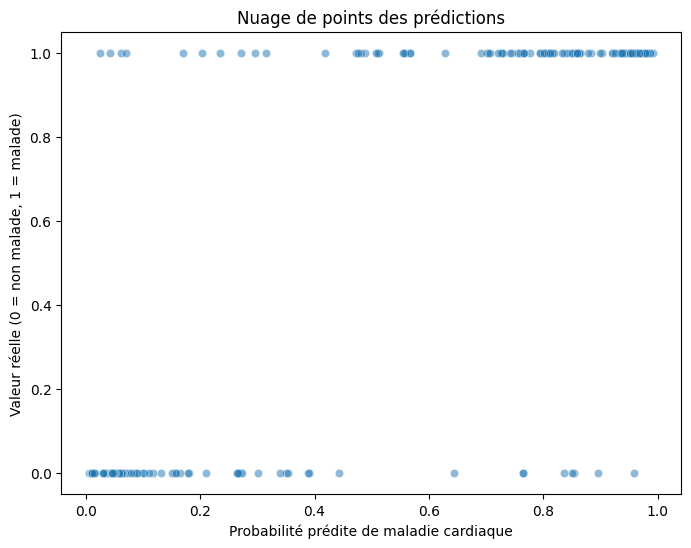

In [420]:
# Nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_prob, y=y_test, alpha=0.5)
plt.xlabel("Probabilit√© pr√©dite de maladie cardiaque")
plt.ylabel("Valeur r√©elle (0 = non malade, 1 = malade)")
plt.title("Nuage de points des pr√©dictions")
plt.show()

- Points proches de 0 ‚Üí Patients pr√©dits comme non malades (classe 0).
- Points proches de 1 ‚Üí Patients pr√©dits comme malades (classe 1).
- Peu de points proches de 0.5, ce qui montre que le mod√®le est s√ªr de ses pr√©dictions.

- Bonne s√©paration des classes : le mod√®le distingue bien malades et non-malades.
- Faible ambigu√Øt√© : peu de pr√©dictions avec une probabilit√© proche de 0.5.

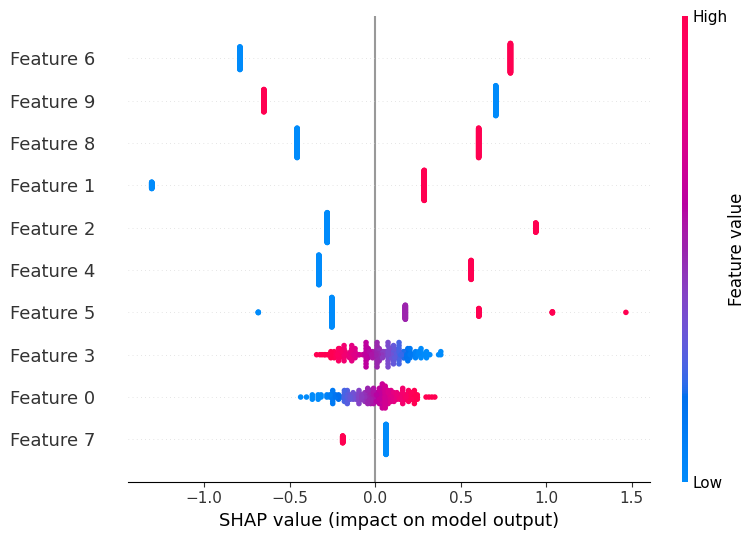

In [421]:
# Interpr√©tation avec SHAP
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

- Couleur :
- üî¥ Rouge ‚Üí Valeur √©lev√©e de la feature.
- üîµ Bleu ‚Üí Valeur faible de la feature.
- Axe X : Impact sur la pr√©diction
- Valeurs positives ‚Üí Augmentent la probabilit√© de maladie.
- Valeurs n√©gatives ‚Üí R√©duisent la probabilit√© de maladie.

- Feature 3 et Feature 5 semblent avoir le plus grand impact sur le mod√®le.
- Les valeurs √©lev√©es de certaines features augmentent fortement le risque de maladie.
- Faible dispersion sur certaines variables, ce qui indique qu'elles influencent peu les pr√©dictions.
- L'interpr√©tation SHAP confirme que certaines variables sont plus d√©terminantes dans la d√©tection des maladies cardiaques ! üöÄ

In [422]:
# Explication des m√©triques
print(f"- Taux de r√©ussite : {accuracy:.2f}% indique combien de pr√©dictions sont correctes sur l'ensemble de test.")
print(f"- Pr√©cision : {precision:.2f}% indique la proportion de pr√©dictions positives correctes parmi toutes les pr√©dictions positives.")

- Taux de r√©ussite : 0.88% indique combien de pr√©dictions sont correctes sur l'ensemble de test.
- Pr√©cision : 0.92% indique la proportion de pr√©dictions positives correctes parmi toutes les pr√©dictions positives.


- Taux de r√©ussite : 88% ‚Üí Le mod√®le fait 88% de pr√©dictions correctes sur l‚Äôensemble de test.
- Pr√©cision : 92% ‚Üí Lorsqu'il pr√©dit une maladie, 92% des cas sont r√©ellement positifs.
- AUC = 0.92 ‚Üí Excellente s√©paration des classes (malades vs non-malades).

In [ ]:
def predire_maladie():
    scaler = joblib.load('scaler.pkl')
    feature_selector = joblib.load('feature_selector.pkl')
    best_model = joblib.load('best_model.pkl')
    
    # Caract√©ristiques d'un patient test (adapter si n√©cessaire)
    input_data =  [38,1,138, 175,0,173,0,0,0, 0, 1, 0, 0, 1, 0,  0,  0, 1]
    
    input_array = np.array(input_data).reshape(1, -1)
    
    # V√©rifier la correspondance des dimensions
    if input_array.shape[1] != scaler.n_features_in_:
        raise ValueError(f"Le mod√®le attend {scaler.n_features_in_} caract√©ristiques, mais {input_array.shape[1]} ont √©t√© fournies.")
    
    input_scaled = scaler.transform(input_array)
    input_selected = feature_selector.transform(input_scaled)
    proba_maladie = best_model.predict_proba(input_selected)[:, 1][0]
    prediction = best_model.predict(input_selected)[0]
    
    print(f"\nProbabilit√© de maladie cardiaque : {proba_maladie * 100:.2f}%")
    print("R√©sultat :", "Malade" if prediction == 1 else "Non malade")
    return prediction, proba_maladie


# Tester la pr√©diction
predire_maladie()


Probabilit√© de maladie cardiaque : 4.76%
R√©sultat : Non malade


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(np.int64(0), np.float64(0.047617012625797234))